In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataDir='/home/srip19-pointcloud/datasets/COCO'
dataType='train2017'

In [3]:
# initialize COCO api for instance annotations
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
coco_ins=COCO(annFile)

loading annotations into memory...
Done (t=27.02s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
# Note that categories' ids are NOT continuous integers
cats = coco_ins.loadCats(coco_ins.getCatIds())
nms = [cat['name'] for cat in cats]
ids = [cat['id'] for cat in cats]
for i in range(len(nms)):
    nms[i] = str(ids[i]) + '. ' + nms[i]
print('COCO categories and ids: \n{}\n'.format('\n'.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format('/'.join(nms)))

COCO categories and ids: 
1. person
2. bicycle
3. car
4. motorcycle
5. airplane
6. bus
7. train
8. truck
9. boat
10. traffic light
11. fire hydrant
13. stop sign
14. parking meter
15. bench
16. bird
17. cat
18. dog
19. horse
20. sheep
21. cow
22. elephant
23. bear
24. zebra
25. giraffe
27. backpack
28. umbrella
31. handbag
32. tie
33. suitcase
34. frisbee
35. skis
36. snowboard
37. sports ball
38. kite
39. baseball bat
40. baseball glove
41. skateboard
42. surfboard
43. tennis racket
44. bottle
46. wine glass
47. cup
48. fork
49. knife
50. spoon
51. bowl
52. banana
53. apple
54. sandwich
55. orange
56. broccoli
57. carrot
58. hot dog
59. pizza
60. donut
61. cake
62. chair
63. couch
64. potted plant
65. bed
67. dining table
70. toilet
72. tv
73. laptop
74. mouse
75. remote
76. keyboard
77. cell phone
78. microwave
79. oven
80. toaster
81. sink
82. refrigerator
84. book
85. clock
86. vase
87. scissors
88. teddy bear
89. hair drier
90. toothbrush

COCO supercategories: 
furniture/person/k

In [5]:
# get all images containing given categories, select one at random
catIds = coco_ins.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco_ins.getImgIds(catIds=catIds);
img = coco_ins.loadImgs(imgIds[np.random.randint(len(imgIds))])[0]

In [6]:
# example of image data
img

{'license': 3,
 'file_name': '000000379520.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000379520.jpg',
 'height': 426,
 'width': 640,
 'date_captured': '2013-11-14 20:25:13',
 'flickr_url': 'http://farm3.staticflickr.com/2240/1602247464_66512b7ea1_z.jpg',
 'id': 379520}

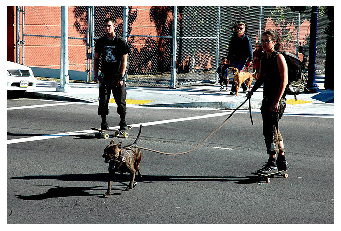

In [7]:
# load and display image
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

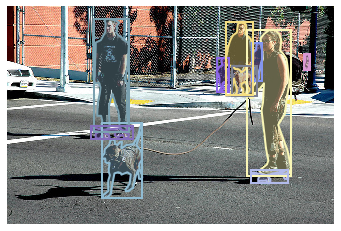

In [8]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco_ins.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_ins.loadAnns(annIds)
coco_ins.showAnns(anns)

In [9]:
# example of anns data
anns[0]

{'segmentation': [[196.37,
   372.96,
   202.83,
   366.86,
   204.98,
   350.37,
   209.64,
   326.7,
   216.46,
   324.55,
   222.19,
   326.34,
   223.27,
   329.21,
   234.75,
   324.55,
   241.56,
   328.85,
   239.41,
   347.14,
   231.16,
   358.61,
   231.88,
   361.84,
   238.69,
   360.77,
   242.64,
   356.82,
   246.22,
   355.39,
   251.6,
   331.36,
   255.55,
   320.24,
   256.62,
   328.49,
   257.7,
   337.46,
   262.0,
   337.81,
   264.15,
   334.59,
   263.08,
   327.77,
   258.77,
   318.09,
   258.41,
   307.69,
   263.08,
   300.52,
   262.36,
   284.02,
   257.7,
   277.57,
   252.68,
   271.11,
   257.7,
   256.77,
   263.08,
   243.14,
   264.15,
   228.79,
   263.08,
   228.79,
   258.77,
   240.63,
   256.62,
   251.39,
   248.37,
   266.81,
   247.3,
   269.32,
   237.26,
   270.75,
   233.67,
   270.75,
   224.35,
   277.21,
   222.91,
   277.21,
   224.35,
   264.66,
   220.04,
   265.37,
   215.74,
   271.11,
   210.36,
   268.96,
   210.36,
   262.86,
 

In [10]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=14.89s)
creating index...
index created!


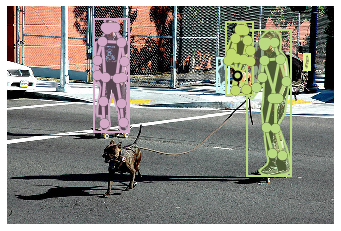

In [11]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [12]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=1.55s)
creating index...
index created!


A person walking a dog on a leash down a street.
THIS IS A GIRL ON A SKATEBOARD WALKING HER PIT BULL
a person that is walking a dog down the street
A person riding on their skateboard while walking their dog.
Her pit bull takes the lead when she is on her skateboard.


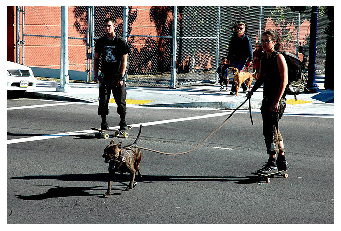

In [13]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()